In [74]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [75]:
df = sns.load_dataset('penguins')
dfcopia = df.copy()
dfcopia = dfcopia.dropna(axis=0)
especies = dfcopia['species'].unique()
print(especies)

dfcopia['specie numerica'] = 0

i = 0
for pinguin in dfcopia['species']:
    #print(pinguin)
    if pinguin == 'Adelie':
        dfcopia['specie numerica'].iloc[i] = 1
        i += 1
    elif pinguin == 'Chinstrap':
        dfcopia['specie numerica'].iloc[i] = 2
        i += 1
    elif pinguin == 'Gentoo':
        dfcopia['specie numerica'].iloc[i] = 0
        i += 1
    #print(dfcopia['species'].iloc[i-1],dfcopia['specie numerica'].iloc[i-1])

features_numericos = ["bill_length_mm","bill_depth_mm", "flipper_length_mm", "body_mass_g"]
df_numericos = dfcopia[features_numericos]

['Adelie' 'Chinstrap' 'Gentoo']


c:\venv\ilumpy\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [76]:
sc = StandardScaler()
sc.fit(df_numericos)
X_norm = sc.transform(df_numericos)

# Clustering hierárquico

O método de clustering hierárquico é popular para agrupar objetos, criando grupos de forma que os objetos de um determinado grupo sejam semelhantes entre si e diferentes de objetos em outros grupos.

O maior benefício desse método é a facilidade de organizar os dados a partir de dendrogramas, que facilitam a sua interpretação e consistem no mecanismo por trás dessa classificação.

In [83]:
# importa a função de clustering aglomerativo hierárquico
from sklearn.cluster import AgglomerativeClustering

Z1 = AgglomerativeClustering(n_clusters=3, linkage='ward')
Z1.fit_predict(X_norm)

print(Z1.labels_) # os números 0, 1 e 2 a seguir correspondem à classificação realizada

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


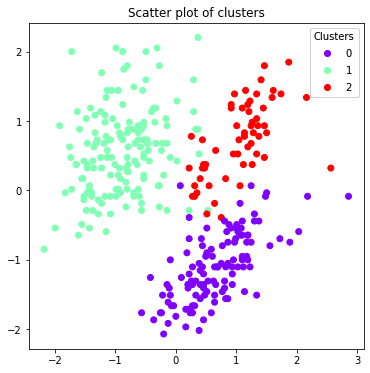

In [84]:
# plotando um gráfico para melhor interpretação:

fig, ax = plt.subplots(figsize=(6,6))
scatter = ax.scatter(X_norm[:,0], X_norm[:,1], c=Z1.labels_, cmap='rainbow')
legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)
plt.title('Scatter plot of clusters')
plt.show()

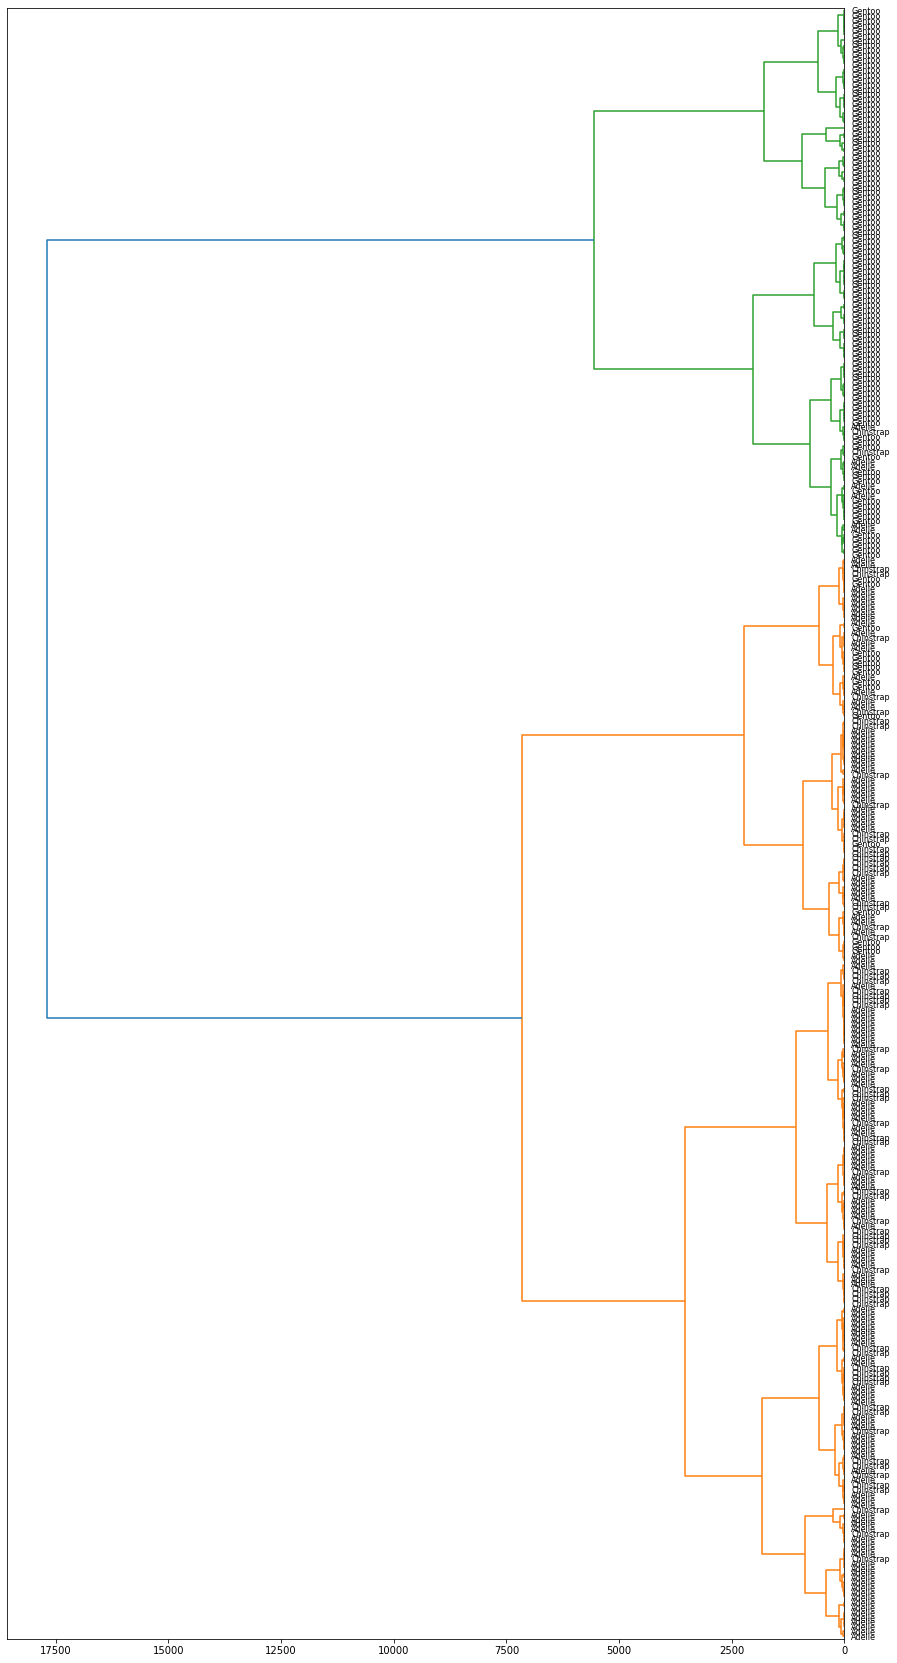

In [85]:
# plotando um dendrograma utilizando o scipy:
from scipy.cluster.hierarchy import dendrogram, linkage

Z2 = linkage(df_numericos, method='ward', metric='euclidean')

# plotando o dendrograma:
# utilizando o outro data frame para acessar a classificação correta por espéciie:
labelList = list(dfcopia['species']) 

plt.figure(figsize=(15,30))

dendrogram(
    Z2,
    orientation='left',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=8
)
plt.show()


Apesar de um tanto confuso e pouco legível devido à quantidade de dados, o dendrograma acima representa uma divisão calculada pela biblioteca `scipy` com base nos dados numéricos. A legenda com as espécies verdadeiras foi adicionada independentemente dessa classificação.

## Comparando a plotagem dos resultados do agrupamento/clustering:

Abaixo, encontra-se a plotagem dos clusteres a partir do método de Clustering Hierárquico:

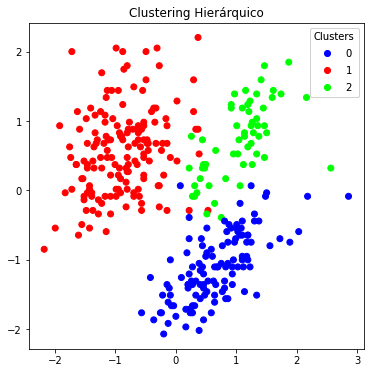

In [88]:
fig, ax = plt.subplots(figsize=(6,6))
scatter = ax.scatter(X_norm[:,0], X_norm[:,1], c=Z1.labels_, cmap='brg')
legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)
plt.title('Clustering Hierárquico')
plt.show()

Na próxima célula, por sua vez, observa-se a mesma plotagem, mas agora pelo método KMeans:
<br>

<img src='kMeans_plot.png'>

_Nota: O gráfico acima foi plotado numa seção extra adicionada posteriormente no notebook de KMeans. A figura é apenas uma imagem salva._

Por fim, a plotagem real da separação por espécie, utilizando como base os dados reais categóricos do dataframe completo:

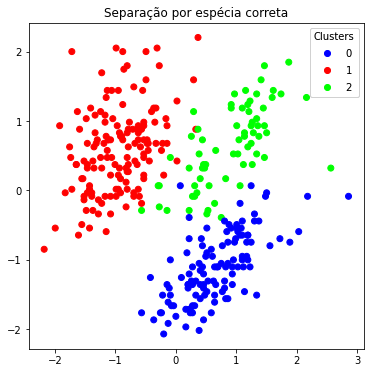

In [89]:
#criando uma array com as espécies reais:
prova_real = np.array(dfcopia["specie numerica"])

fig, ax = plt.subplots(figsize=(6,6))
scatter = ax.scatter(X_norm[:,0], X_norm[:,1], c=prova_real, cmap='brg')
legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(1, 1))
ax.add_artist(legend)
plt.title('Separação por espécia correta')
plt.show()


Partindo dos três gráficos acima, nota-se que a classificação pelo método hierárquico se assemelha muito mais à separação por espécie original do que o clustering por KMeans, provando sua eficiência. No entanto, vale notar que para análise acima não foi considerada a fitagem com o método de PCA (melhor explicado no notebook de KMeans), algo que pode ter influenciado sua avaliação.